In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
HOME = "/lnet/troja/projects/neuralpiece/intrinsic-segmentation-eval/"

In [3]:
def load_csv_result(path, skip_header=True):
    vocab = []
    mean = []
    low = []
    high = []
    with open(path) as f_csv:
        if skip_header:
            f_csv.readline()
        for line in f_csv:
            vocab_str, mean_str, low_str, high_str = line.strip().split(",")
            vocab.append(int(vocab_str))
            mean.append(float(mean_str))
            low.append(float(low_str))
            high.append(float(high_str))
    return vocab, mean, low, high

In [4]:
def load_experiments_results(lng, init_type, eval_file):
    vocab = []
    mean = []
    low = []
    high = []
    for size in [1, 2, 4, 8, 16, 24, 32, 40, 48, 56, 64, 96, 72, 80, 128, 160, 192]:
        path = f"{HOME}/{lng}/experiments/from_{init_type}{size}k/{eval_file}"
        if not os.path.exists(path):
            continue
        with open(path) as f:
            data = f.readline().strip().split(",")
        if len(data) != 4:
            continue
        voc_str, mean_str, low_str, high_str = data
        vocab.append(int(voc_str))
        mean.append(float(mean_str))
        low.append(float(low_str))
        high.append(float(high_str))
    return vocab, mean, low, high

In [5]:
def plot_line_with_confidence(vocab, mean, low, high, title, ax):
    first_line = ax.plot(vocab, mean, label=title, marker=".", markersize=2)[0]
    ax.plot(vocab, low, linewidth=0, markersize=3, marker="_", color=first_line._color)
    ax.plot(vocab, high, linewidth=0, markersize=3, marker="_", color=first_line._color)
    #ax.fill_between(vocab, low, high, alpha=0.2, color=first_line._color)
    
def plot_point_confidence(vocab, mean, low, high, title, ax, vocab_left):
    if not vocab:
        return
    if vocab[0] <= 56000:
        point = ax.plot(vocab, mean, label=title, marker=".", markersize=7, linewidth=0)[0]
        ax.plot(vocab, low, marker="_", markersize=10, linewidth=0, color=point._color)
        ax.plot(vocab, high, marker="_", markersize=10, linewidth=0, color=point._color)
        if vocab_left:
            ax.annotate(str(int(vocab[0]/1000))+"k", (vocab[0] - 1000, mean[0] - 1.5), horizontalalignment='right', verticalalignment='center')
        else:
            ax.annotate(str(int(vocab[0]/1000))+"k", (vocab[0], mean[0] + 1.5), horizontalalignment='center')
    else:
        point = ax.plot([53500], mean, label=title, marker=9, markersize=8, linewidth=0)[0]
        #ax.plot([184000], mean, marker=9, markersize=8, linewidth=0, color=point._color)
        ax.plot([55000], mean, marker=9, markersize=8, linewidth=0, color=point._color)
        ax.plot([56500], mean, marker=9, markersize=8, linewidth=0, color=point._color)
        if vocab_left:
            ax.annotate(str(int(vocab[0]/1000))+"k", (52500, mean[0]), horizontalalignment='right', verticalalignment='center')
        else:
            ax.annotate(str(int(vocab[0]/1000))+"k", (52000, mean[0] + 1.5))

In [135]:
LNG_NAMES = {
    "cs": "Czech",
    "de": "German",
    "en": "English",
    "es": "Spanish",
    "fi": "Finish",
    "fr": "French",
    "hu": "Hungarian",
    "it": "Italian",
    "mn": "Mongolian",
    "ru": "Russian"
}

def plot_lng(lng, ax, test_set, show_y_label=False, suffix="score", vocab_left=False):
    if not os.path.exists(f"{HOME}/{lng}/baselines/{test_set}.bpe.{suffix}"):
        return
    
    plot_line_with_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.bpe.{suffix}"), title="BPE", ax=ax)
    plot_line_with_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.spm.{suffix}"), title="SP", ax=ax)
    #plot_point_confidence(
    #    *load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.morfessor.{suffix}"), title="Morfessor", ax=ax, vocab_left=vocab_left)
    
    plot_line_with_confidence(*load_experiments_results(lng, "sp", f"{test_set}.embedding-based.{suffix}"), title="Emb. SP", ax=ax)
    #plot_line_with_confidence(*load_experiments_results(lng, "sp", f"bigrams.{suffix}"), title="Bigram SP", ax=ax)

    plot_line_with_confidence(*load_experiments_results(lng, "bpe", f"{test_set}.embedding-based.{suffix}"), title="Emb. BPE", ax=ax)
    #plot_line_with_confidence(*load_experiments_results(lng, "bpe", f"bigrams.{suffix}"), title="Bigram BPE", ax=ax)

    plot_line_with_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.morf-bpe.{suffix}"), title="M+BPE", ax=ax)
    plot_line_with_confidence(*load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.morf-spm.{suffix}"), title="M+SP", ax=ax)

    plot_line_with_confidence(*load_experiments_results(lng, "morf-bpe", f"{test_set}.embedding-based.{suffix}"), title="Emb. M+BPE", ax=ax)
    plot_line_with_confidence(*load_experiments_results(lng, "morf-bpe", f"bigrams.{suffix}"), title="EmbBigr M+BPE", ax=ax)
    plot_line_with_confidence(*load_experiments_results(lng, "morf-bpe", f"init_bigrams.{suffix}"), title="InitBigr M+BPE", ax=ax)

    plot_line_with_confidence(*load_experiments_results(lng, "morf-sp", f"{test_set}.embedding-based.{suffix}"), title="Emb. M+SP", ax=ax)
    plot_line_with_confidence(*load_experiments_results(lng, "morf-sp", f"bigrams.{suffix}"), title="EmbBigr M+SP", ax=ax)
    plot_line_with_confidence(*load_experiments_results(lng, "morf-sp", f"init_bigrams.{suffix}"), title="InitBigr M+SP", ax=ax)
    
    #plot_point_confidence(
    #    *load_csv_result(f"{HOME}/{lng}/experiments/from_morfessor/{test_set}.embedding-based.{suffix}", skip_header=False),
    #    title="Emb. Morfessor", ax=ax, vocab_left=vocab_left)
    #plot_point_confidence(
    #    *load_csv_result(f"{HOME}/{lng}/experiments/from_morfessor/{test_set}.bigrams.{suffix}", skip_header=False),
    #    title="Bigrams Morfessor", ax=ax)

    if suffix == "score":
        ax.set_ylim(40, 100)
        ax.annotate(LNG_NAMES[lng], (55000,43), fontsize=20, horizontalalignment="right")
    elif suffix == "recall":
        ax.set_ylim(35, 90)
        ax.annotate(LNG_NAMES[lng], (55000,38), fontsize=20, horizontalalignment="right")
    elif suffix == "fscore":
        ax.set_ylim(40, 85)
        ax.annotate(LNG_NAMES[lng], (55000,42), fontsize=20, horizontalalignment="right")
    
    ax.set_xlabel("Subword vocabulary size", fontsize=13)
    #ax.set_xlim(0, 192000)
    ax.set_xlim(1000, 58000)
    ax.set_xscale("linear")
    
    #ax.set_xlim(0, 150000)
    #ax.set_xticks([0, 50000, 100000, 150000])    
    #ax.set_xticklabels(["0", "50k", "100k", "150k"])
    
    
    if show_y_label:
        if suffix == "score":
            ax.set_ylabel("Boundary position precision", fontsize=13)
        elif suffix == "recall":
            ax.set_ylabel("Boundary position recall", fontsize=13)
        else:
            ax.set_ylabel("Boundary position F-score", fontsize=13)
        

In [136]:
def plot_all_results(test_set, suffix="score"):
    fig, axs = plt.subplots(2, 5, sharey=True, figsize=(16, 8))
    plt.axis('on')
    axs[0].set_aspect('equal')
    
    plot_lng("cs", axs[0, 0], test_set, show_y_label=True, suffix=suffix)
    plot_lng("de", axs[0, 1], test_set, suffix=suffix)
    plot_lng("en", axs[0, 2], test_set, suffix=suffix)
    plot_lng("es", axs[0, 3], test_set, suffix=suffix)
    plot_lng("fi", axs[0, 4], test_set, suffix=suffix)

    plot_lng("fr", axs[1, 0], test_set, show_y_label=True, suffix=suffix)
    plot_lng("hu", axs[1, 1], test_set, suffix=suffix)
    plot_lng("it", axs[1, 2], test_set, suffix=suffix)
    plot_lng("mn", axs[1, 3], test_set, suffix=suffix)
    plot_lng("ru", axs[1, 4], test_set, suffix=suffix)

    #lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    #lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    lines, labels = axs[0, 0].get_legend_handles_labels()
    fig.legend(lines, labels, loc="lower center", ncols=10, frameon=False, fontsize=14)

In [137]:
#plot_all_results("test")

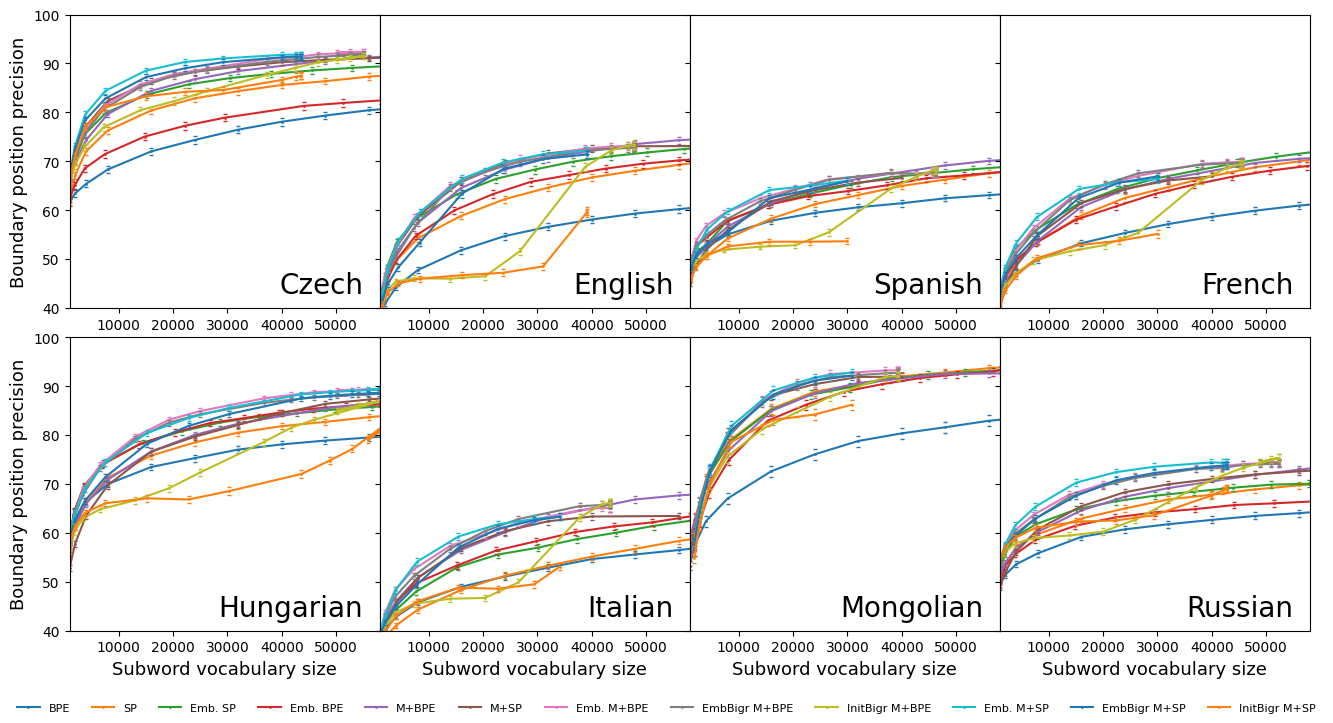

In [146]:
def plot_sigmorphon(test_set, suffix="score"):
    fig, axs = plt.subplots(2, 4, sharey=True, figsize=(16, 8), gridspec_kw = {'wspace':0, 'hspace': 0.1})
    #plt.axis('on')

    if suffix == "score":
        plot_lng("cs", axs[0, 0], test_set, show_y_label=True, suffix=suffix, vocab_left=True)
    else:
        plot_lng("cs", axs[0, 0], test_set, show_y_label=True, suffix=suffix, vocab_left=False)
    plot_lng("en", axs[0, 1], test_set, suffix=suffix)
    plot_lng("es", axs[0, 2], test_set, suffix=suffix)
    plot_lng("fr", axs[0, 3], test_set, suffix=suffix)
    
    plot_lng("hu", axs[1, 0], test_set, show_y_label=True, suffix=suffix, vocab_left=True)
    plot_lng("it", axs[1, 1], test_set, suffix=suffix)
    plot_lng("mn", axs[1, 2], test_set, suffix=suffix)
    plot_lng("ru", axs[1, 3], test_set, suffix=suffix)

    #lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
    #lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
    lines, labels = axs[0, 3].get_legend_handles_labels()
    fig.legend(lines, labels, loc="lower center", ncols=12, frameon=False, fontsize=8)
    return fig
plot_sigmorphon("sigmorphon").savefig("precision.pdf", bbox_inches='tight')

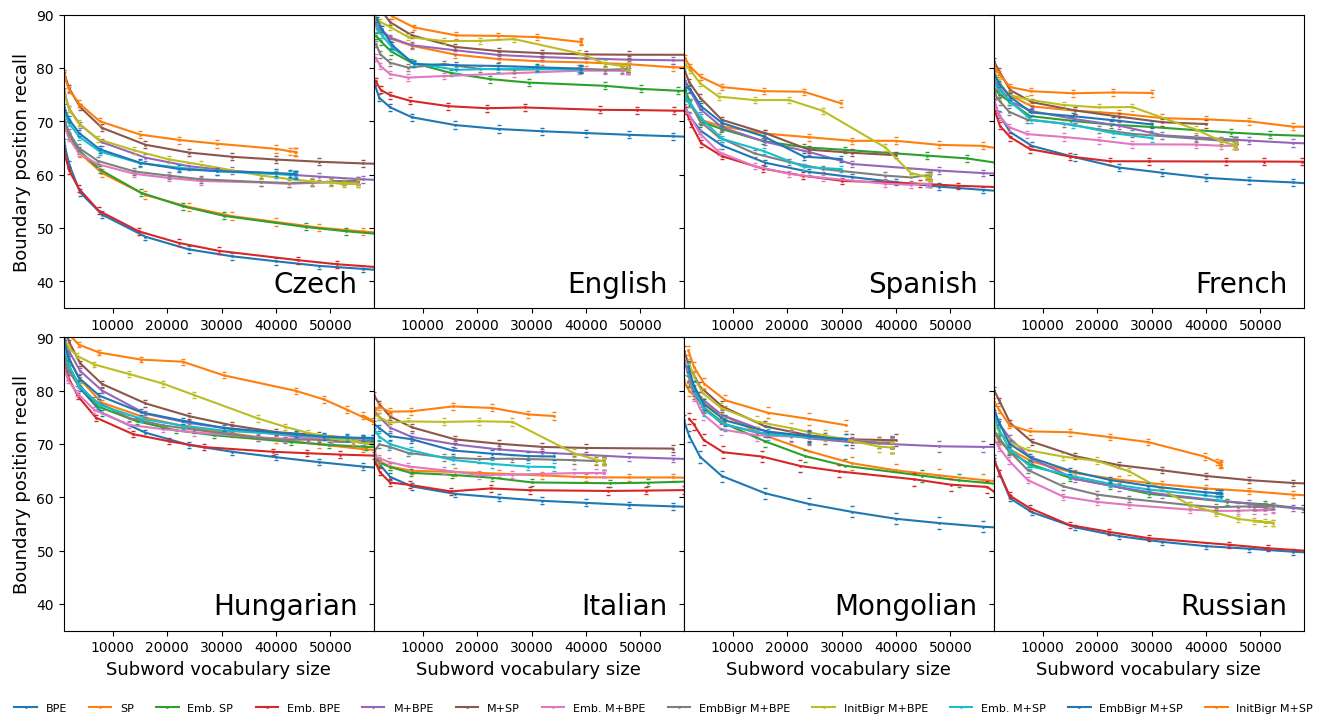

In [147]:
plot_sigmorphon("sigmorphon", suffix="recall").savefig("recall.pdf", bbox_inches='tight')

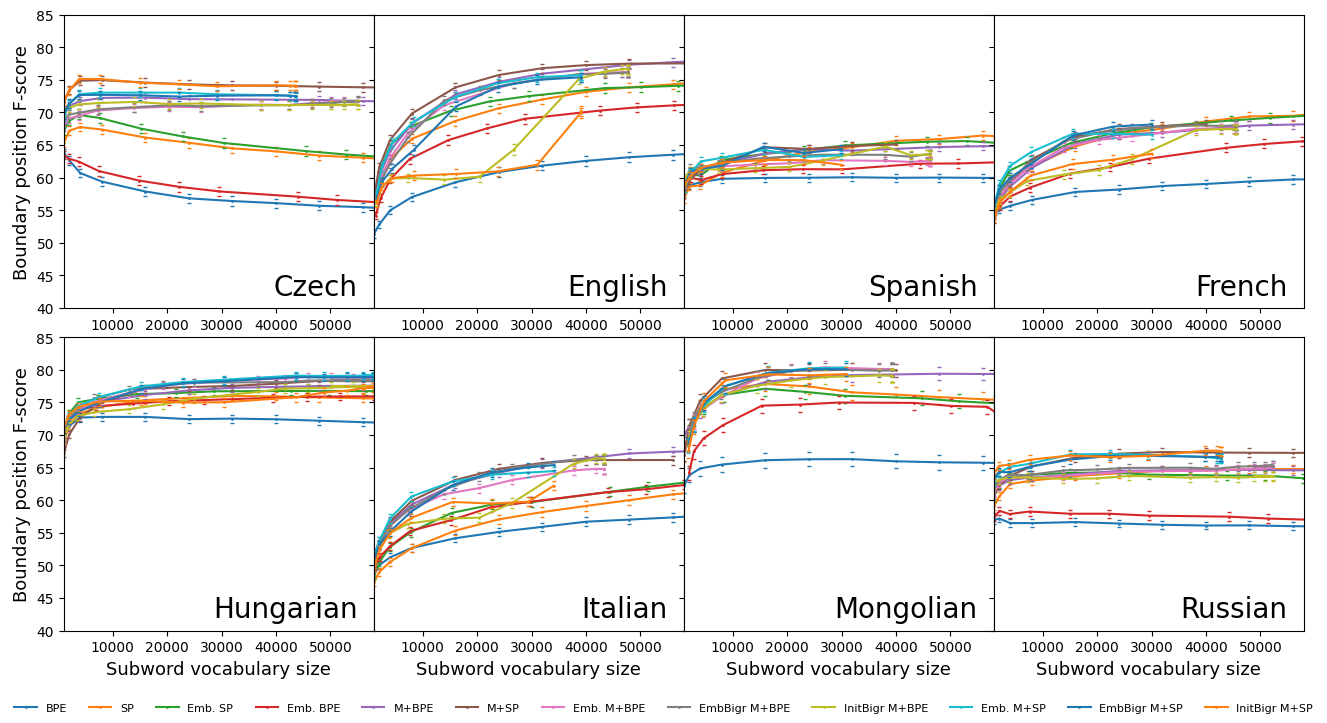

In [148]:
plot_sigmorphon("sigmorphon", suffix="fscore").savefig("fscore.pdf", bbox_inches='tight')

In [141]:
!pdftk precision.pdf recall.pdf fscore.pdf cat output scores.pdf

In [168]:
def print_line(pretok: str, vocab_learn: str, inference: str, distill: str, data):
    print(f"{pretok},{vocab_learn},{inference},{distill}," +
          ",".join(str(x) for x in data[1][3:11]))


def csv_lng(lng, test_set="sigmorphon", suffix="score"):
    if not os.path.exists(f"{HOME}/{lng}/baselines/{test_set}.bpe.{suffix}"):
        return

    print_line("words", "BPE", "BPE", "No", load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.bpe.{suffix}"))
    print_line("words", "SP", "SP", "No", load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.spm.{suffix}"))

    print_line("words", "SP", "Emb.", "No", load_experiments_results(lng, "sp", f"{test_set}.embedding-based.{suffix}"))
    print_line("words", "BPE", "Emb.", "No", load_experiments_results(lng, "bpe", f"{test_set}.embedding-based.{suffix}"))

    print_line("words", "SP", "Emb.", "Yes", load_experiments_results(lng, "sp", f"bigrams.{suffix}"))
    print_line("words", "BPE", "Emb.", "Yes", load_experiments_results(lng, "bpe", f"bigrams.{suffix}"))

    
    # TODO add distilled bigrams with word pretok
    
    print_line("morf", "BPE", "BPE", "No", load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.morf-bpe.{suffix}"))
    print_line("morf", "SP", "SP", "No", load_csv_result(f"{HOME}/{lng}/baselines/{test_set}.morf-spm.{suffix}"))

    print_line("morf", "BPE", "Emb", "No", load_experiments_results(lng, "morf-bpe", f"{test_set}.embedding-based.{suffix}"))
    print_line("morf", "BPE", "Emb", "Yes", load_experiments_results(lng, "morf-bpe", f"bigrams.{suffix}"))
    print_line("morf", "BPE", "BPE", "Yes", load_experiments_results(lng, "morf-bpe", f"init_bigrams.{suffix}"))

    print_line("morf", "SP", "Emb", "No", load_experiments_results(lng, "morf-sp", f"{test_set}.embedding-based.{suffix}"))
    print_line("morf", "SP", "Emb", "Yes", load_experiments_results(lng, "morf-sp", f"bigrams.{suffix}"))
    print_line("morf", "SP", "SP", "Yes", load_experiments_results(lng, "morf-sp", f"init_bigrams.{suffix}"))

LNG_AND_CODE = [
    ("Czech", "cs"), ("English", "en"), ("Spanish", "es"), ("French", "fr"),
    ("Hungarian", "hu"), ("Italian", "it"), ("Mongolian", "mn"), ("Russian", "ru")]

for lng, code in LNG_AND_CODE:
    print(lng)
    #csv_lng(code, suffix="score")
    #csv_lng(code, suffix="recall")
    csv_lng(code, suffix="fscore")
    print()

Czech
words,BPE,BPE,No,59.37599198801514,57.8527402976146,56.805712870299566,56.38971921800439,56.06971631217317,55.66329760248752,55.452867261395575,55.09354282225569
words,SP,SP,No,67.35820187570009,66.12981040467507,65.3346103560959,64.47598312322826,64.01065756290227,63.36632377629043,63.03925653768178,62.63555504785337
words,SP,Emb.,No,69.13209086776801,67.49672796907541,66.29549768187282,65.2942313867984,64.05431804748656,63.52983727329851,63.11062778822508,62.19908302042411
words,BPE,Emb.,No,60.99106281790029,59.53788073932933,58.57989837565002,57.87608407772133,57.062231305333576,56.55707873575163,56.225450830875474,55.35427724003763
words,SP,Emb.,Yes,69.47439593491909,67.75701988800103,66.4055178318527,65.29410762119066,63.92436306340166,63.3608609777121,62.981047746761675,62.05245851727812
words,BPE,Emb.,Yes,61.34904819152079,60.224391731735075,59.11500730497472,58.40215189571006,57.47710885308839,57.139686589152205,56.62660766530599,55.93428361108917
morf,BPE,BPE,No,72.21952

In [173]:
load_experiments_results("en", "morf-sp", f"init_bigrams.score")

([1509, 2472, 4424, 8363, 16123, 23752, 31063, 39041, 39093],
 [40.292, 43.109, 44.992, 45.975, 46.689, 47.188, 48.49, 59.457, 59.849],
 [39.832, 42.603, 44.44, 45.377, 46.048, 46.501, 47.738, 58.618, 59.002],
 [40.77, 43.643, 45.569, 46.586, 47.345, 47.913, 49.257, 60.274, 60.663])

In [185]:
load_csv_result(f"{HOME}/en/baselines/sigmorphon.morf-spm.score")[0][3:11]


[8000, 16000, 24000, 32000, 40000, 48000, 64000]